### 데이터 시각화 패키지 맥플롯리브
matplotlib 패키지는 파이썬에서 데이터를 차트 혹은 플롯으로 시각화하는 패키지
- 선형 그래프 (live plot)
- 점 그래프 (scatter plot)
- 등고선 (contour plot)
- 표면도 (surface plot)
- 막대그래프 (bar chart)
- 히스토그램 (histogram)
- 박스 그래프 (box plot)

#### pyplot 하위 패키지
간단한 시각화 자료를 만들때 사용되는 matplotlib 의 하위 패키지  
matplotlib 패키지를 직접 사용하지 않고 단순히 pyplot 만으로 시각화를 할 수 있음

```python
import matplotlib as mpl
import matplotlib.pyplot as plt
```

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
%matplotlib inline

In [7]:
# matplotlib 한글 표시 설정
import matplotlib.font_manager as fm

# matplotlib의 글꼴 관리자에 특정 글꼴 추가
fe=fm.FontEntry(
    fname=r'font/NanumGothic.ttf',          # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                       
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가

#pyplot에 matplotlib의 글꼴 관리자에 등록된 글꼴 적용
plt.rcParams.update({'font.size': 14, 'font.family': 'NanumGothic'})

#pyplot에서 `-`를 문자로 취급하도록 설정
plt.rcParams['axes.unicode_minus'] = False

#### 차트의 종류

**막대 그래프** : 데이터의 카테고리별 값을 막대로 나타내는 방식 (수직 막대 그래프, 수평 막대 그래프)
> 카테고리별로 비교할 때 주로 사용됨 (제품별 판매량, 지역별 인구수)

**선 그래프** : 시간의 흐름에 따른 데이터 포인터를 선으로 연결하여 나타내는 방식
> 시간의 흐름에 따라 비교할 때 주로 사용됨 (기온의 변화,주식가격)

**파이 차트** : 전체에 대한 비율을 원형으로 나타내는 방식 (각 조각의 크기가 해당 부분의 비율을 의미함)
> 전체에 대한 비율을 비교할 때 주로 사용됨

**산점도** : 두 변수 간의 상관 관걔를 점들의 분포로 나타내는 방식
> 두 변수의 상관 관계를 파악할 때 주로 사용됨(키와 몸무게의 상관관계)

**히스토그램** : 범위별로  그룹화해서 각 그룹에 속하는 데이터 포인터의 수를 막대로 나타내는 방식
> 데이터의 분포를 비교할 때 주로 사용됨 (시험 점수의 분포)

**영억 그래프** : 선 그래프의 아래 영역에 색으로 채운 형태
> 시간의 흐름에 따라 비교할 때 주로 사용됨, 변화량을 강조할 때 주로 사용됨 (누적 감염자,누적 수출량)

**박스 그래프** : 데이터의 분포를 나타내는 방식, 최소값, 최대값, 사분위를 나타내는 방식
> 데이터의 이상치를 판단할 때 주로 사용됨 

### 라인 플롯 (선 그래프)
가장 기본적인 그래프로 데이터가 시간의 흐름, 순서에 따라 변할 때 사용됨
pyplot 하위 패키지의 `plot()` 메서드로 간단하게 생성 가능, 매개변수로 리스트 혹은 배열을 전달

<function matplotlib.pyplot.show(close=None, block=None)>

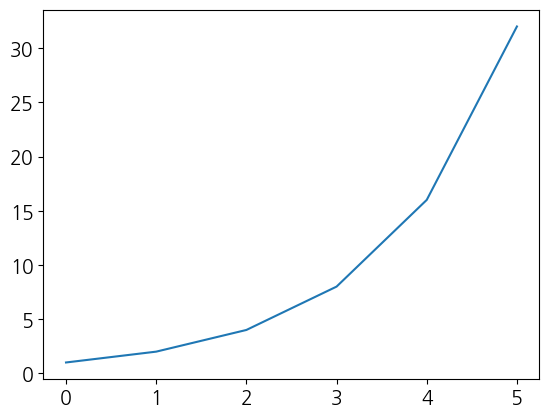

In [22]:
 # x 축의 자료 위치 즉, 틱(tick)은 자동으로 0, 1, 2, 3,4,5 이 된다
plt.plot([1,2,4,8,16,32])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

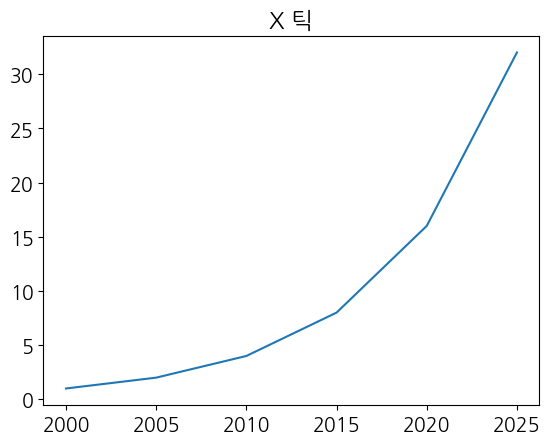

In [23]:
plt.title('X 틱')
plt.plot([2000,2005,2010,2015,2020,2025],[1,2,4,8,16,32])
plt.show

### 차트 스타일 지정
`plot()` 메서드에 특정한 문자열 매개변수를 전달하면 스타일을 변경할 수 있음 

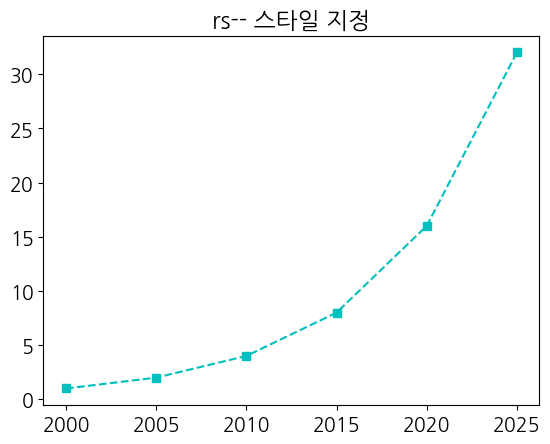

In [24]:
plt.title('rs-- 스타일 지정')
plt.plot([2000,2005,2010,2015,2020,2025],[1,2,4,8,16,32],'cs--')
plt.show()

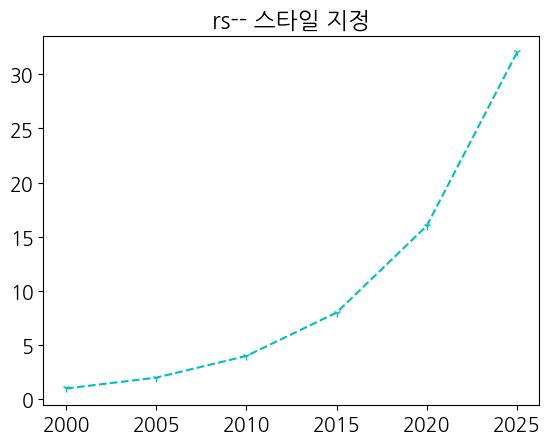

In [25]:
plt.title('rs-- 스타일 지정')
plt.plot([2000,2005,2010,2015,2020,2025],[1,2,4,8,16,32],'c1--')
plt.show()

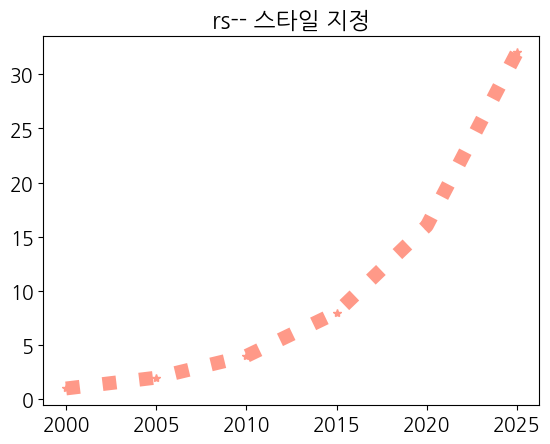

In [26]:
plt.title('rs-- 스타일 지정')
plt.plot([2000,2005,2010,2015,2020,2025],[1,2,4,8,16,32],lw=10,c='#ff9988',ls=':',marker='*')
plt.show()

#### `plot()` 메서드의 스타일 매개변수
- color (c) : 선 색깔
- linewidth (lw) : 선 굵기
- linestyle (ls) : 마커 종류
- makersize(ms) : 마커 크기
- markeredgecolor(mec) : 마커 테두리 색상
- markeredgewidth(mew): 마커 테두리 굵기
- markerecolor(mfc) : 마커 내부 색깔

### 차트 범위 지정
`xlim()`, `ylim()` 메서드로 x축과 y축의 상하한 값을 지정할 수 있음

<function matplotlib.pyplot.show(close=None, block=None)>

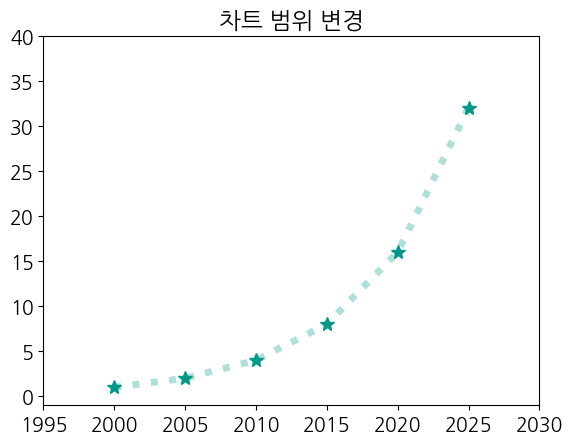

In [28]:
plt.title('차트 범위 변경')
plt.plot([2000, 2005, 2010, 2015, 2020, 2025], [1, 2, 4, 8, 16, 32], 
         lw=5, c='#00998850', ls=':', marker='*', ms=10, mfc='#009988')
plt.xlim(1995, 2030)
plt.ylim(-1, 40)
plt.show

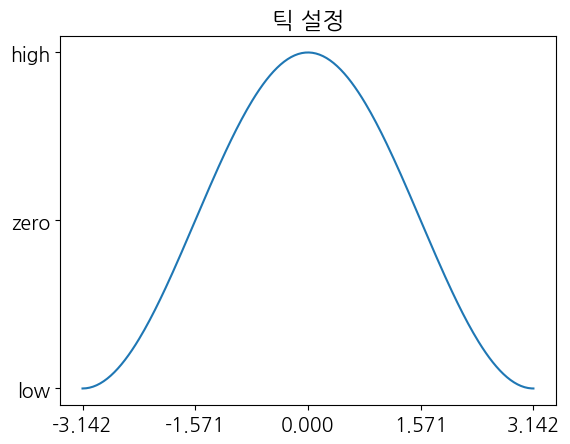

In [29]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.title('틱 설정')
plt.plot(X,C) # x축과 Y축에 X , C 넣음
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
plt.yticks([-1,0,1],['low','zero','high'])
plt.show()

### Grid 설정
`grid()` 메서드로 그리드를 표현할지 말지를 정할 수 있음

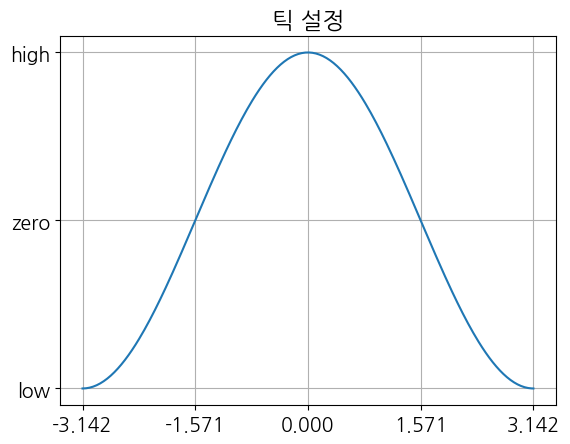

In [30]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.title('틱 설정')
plt.plot(X,C) # x축과 Y축에 X , C 넣음
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
plt.yticks([-1,0,1],['low','zero','high'])
plt.grid(True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

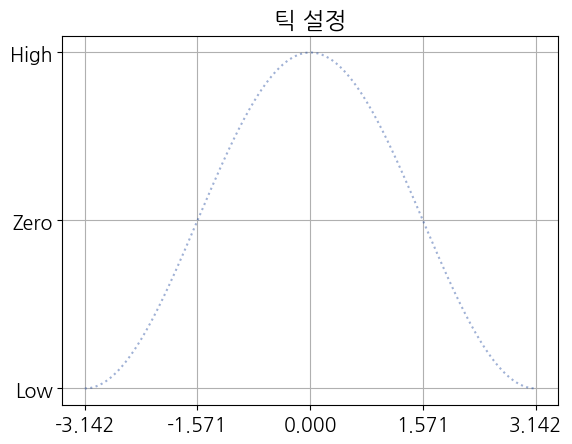

In [31]:
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.title('틱 설정')
plt.plot(X, C, c='#00309060', ls=':')
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi]) # , ['아', '이', '우', '에', '오'])
plt.yticks([-1, 0, 1], ['Low', 'Zero', 'High'])
plt.grid(True)
plt.show

### 여러 그래프 하나의 차트에 표현하기
`plot()` 메서드에 x,y,style 매개변수를 반복해서 전달하여  
여러 그래프를 하나의 차트에 표현할 수 있음 (스타일 문자열 생략 불가능)

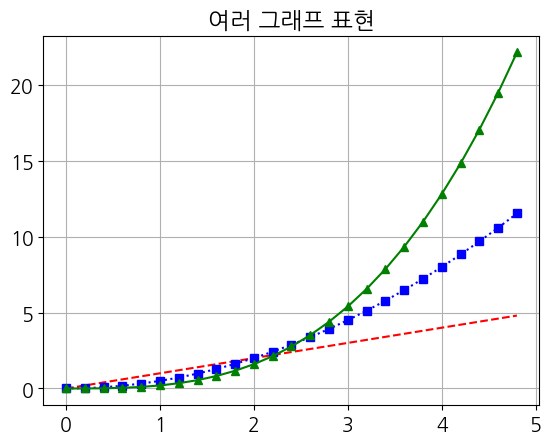

In [32]:
t = np.arange(0.,5.,0.2)
plt.title('여러 그래프 표현')
plt.plot(t,t,'r--',t,0.5 * t ** 2, 'bs:',t,0.2*t**3,'g^-')
plt.grid(True)
plt.show()

#### 차트 겹치기

plot() 메서드를 중복해서 작성하여 차트를 겹칠 수 있음

In [ ]:
plt.title('차트 겹치기')
plt.plot([2000, 2005, 2010, 2015, 2020, 2025], [1, 2, 4, 8, 16, 32], 
         lw=5, c='#99880050', ls=':', marker='*', ms=10, mfc='#998800')
plt.plot([2000, 2005, 2010, 2015, 2020, 2025], [32, 16, 8, 4, 2, 1], 
         lw=5, c='#00998850', ls=':', marker='o', ms=10, mfc='#009988')
plt.show

### 범례
여러 개의 그래프가 한 차트에 표시 될 때  
각 그래프가 무엇을 의미하는지 보여주는 범례를 표현할 수 있음

`legend()` 메서드로 표현 (`plot()`메서드에 `label`매개변수를 지정해야함), 위치를 수동으로 지정하고 싶으면 `loc`
매개 변수를 사용함

<function matplotlib.pyplot.show(close=None, block=None)>

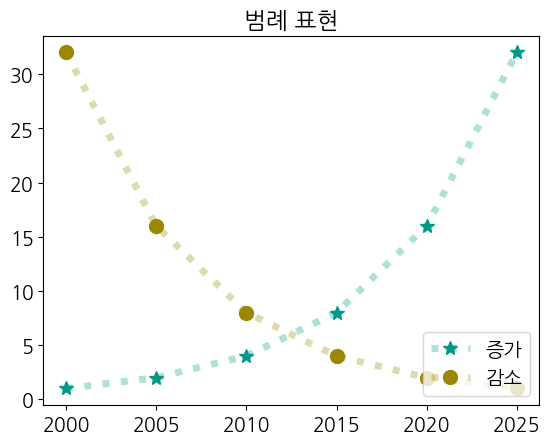

In [14]:
plt.title('범례 표현')
plt.plot([2000,2005,2010,2015,2020,2025],[1,2,4,8,16,32],lw=5,c='#00998850',ls=':',marker='*',ms=10,mfc='#009988', label='증가')
plt.plot([2000,2005,2010,2015,2020,2025],[32,16,8,4,2,1],lw=5,c='#99880050',ls=':',marker='o',ms=10,mfc='#998800',label='감소')
plt.legend(loc=4)
plt.show

### x축 , y축 라벨 
`xlabel()` ,`ylabel()` 메서드로 x축과 y축의 라벨을 표시할 수 있음

<function matplotlib.pyplot.show(close=None, block=None)>

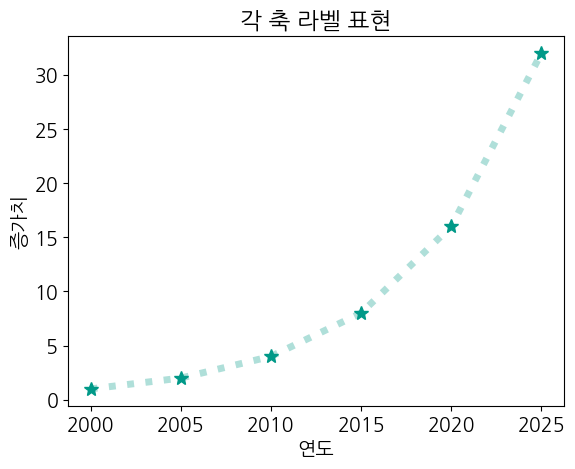

In [12]:
plt.title('각 축 라벨 표현')
plt.plot([2000,2005,2010,2015,2020,2025],[1,2,4,8,16,32],lw=5,c='#00998850',ls=':',marker='*',ms=10,mfc='#009988', label='증가')
plt.xlabel('연도')
plt.ylabel('증가치')
plt.show

#### 차트 그림의 구조

matplotlib 으로 그려지는 차트는 Figure 객체, Axes객체, Axis 객체로 구성이 되어져 있음  
Figure 객체는 하나 이상의 Axes 객체를 포함하고 있고, Axes 객체는 두개 이상의 Axis 객체를 포함하고 있음  

- `Figure` : 차트가 그려지는 캔버스
- `Axes` : 하나의 플롯 (그래프)
- `Axis` : 하나의 축

#### Figure 객체 
모든 차트 그래프 결과는 Figure 객체에 포함되어 있음  
내부 차트가 아닌 경우 하나의 Figure 객체에는 하나의 아이디와 윈도우를 가짐  
일반적으로 기본 파이썬에서 차트를 표시하면 Figure 하나당 하나의 윈도우를 가짐

`plot` 메서드가 자동으로 Figure 객체를 생성하기 때문에 직접 생성하는 경우는 드물지만  
여러개의 윈도우를 동시에 출력할 때나 차트 전체의 크기를 변경하고 싶을 때 사용할 수 있음

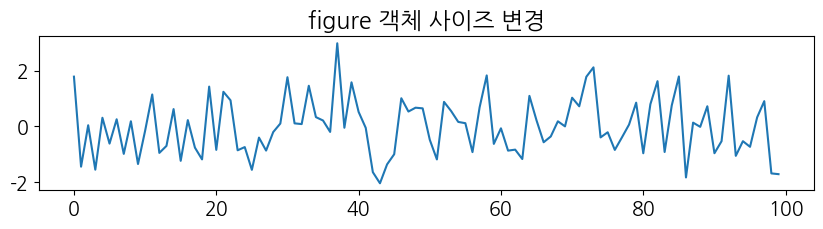

In [15]:
f1 = plt.figure(figsize=(10,2))
plt.title('figure 객체 사이즈 변경')
plt.plot(np.random.randn(100))
plt.show()

현재 사용하고 있는 Figure 객체를 얻으려면 `gcf()` 메서드로 얻을 수 있음

2424358905056
2424358905056


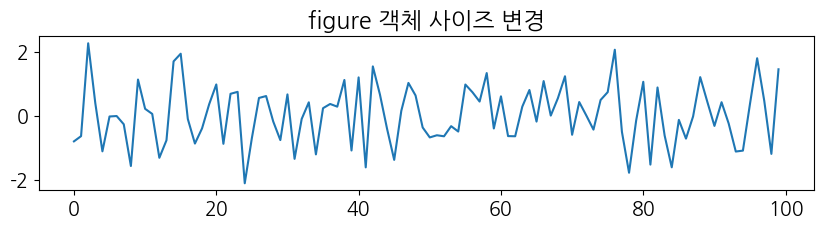

2424379671040


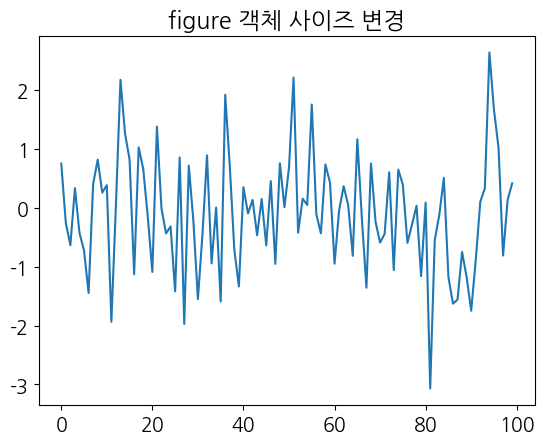

In [21]:
f1 = plt.figure(figsize=(10,2))
plt.title('figure 객체 사이즈 변경')
plt.plot(np.random.randn(100))

f2 =plt.gcf()
print(id(f1))
print(id(f2))
plt.show()

plt.title('figure 객체 사이즈 변경')
plt.plot(np.random.randn(100))

f3= plt.gcf()
print(id(f3))